In [12]:
!pip install plotly

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import datetime
import requests
import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
py.init_notebook_mode(connected=True)

In [14]:

covid19India = pd.read_csv('https://raw.githubusercontent.com/Raghavcrocrox/covid-19-prediction/master/datasets_557629_1479225_covid_19_india.csv')
indiDetails = pd.read_csv('https://raw.githubusercontent.com/Raghavcrocrox/covid-19-prediction/master/IndividualDetails.csv')
stateDetails = pd.read_csv('https://raw.githubusercontent.com/Raghavcrocrox/covid-19-prediction/master/datasets_557629_1479225_StatewiseTestingDetails.csv')

In [15]:
covid19India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6176 entries, 0 to 6175
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       6176 non-null   int64 
 1   Date                      6176 non-null   object
 2   Time                      6176 non-null   object
 3   State/UnionTerritory      6176 non-null   object
 4   ConfirmedIndianNational   6176 non-null   object
 5   ConfirmedForeignNational  6176 non-null   object
 6   Cured                     6176 non-null   int64 
 7   Deaths                    6176 non-null   int64 
 8   Confirmed                 6176 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 434.4+ KB


In [23]:
covid19India['Date'] = pd.to_datetime(covid19India['Date'],dayfirst=True)
df1=covid19India.groupby('Date').sum()
df1.reset_index(inplace=True)

In [25]:
df1.head()

,Date,Sno,Cured,Deaths,Confirmed
0,2020-01-30,1,0,0,1
1,2020-01-31,2,0,0,1
2,2020-02-01,3,0,0,2
3,2020-02-02,4,0,0,3
4,2020-02-03,5,0,0,3


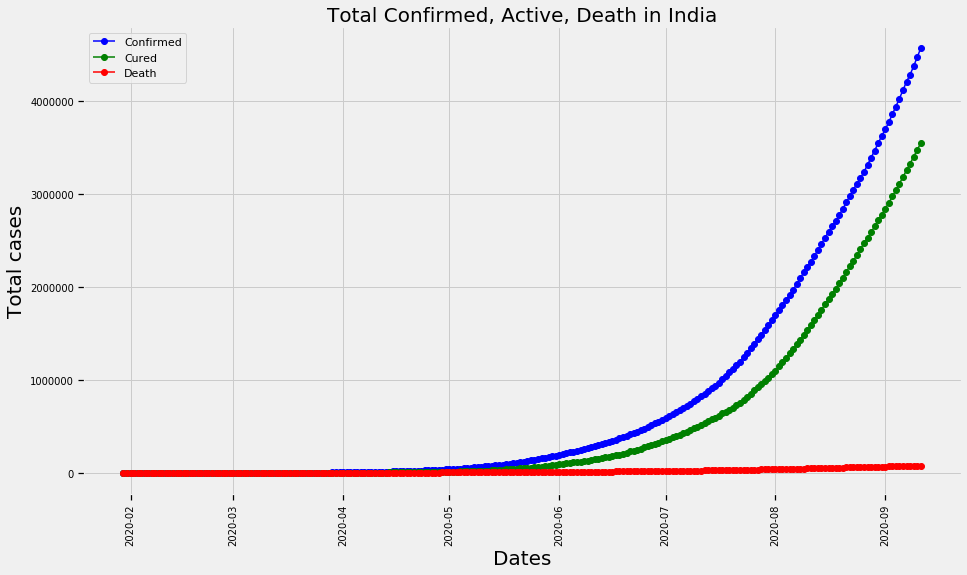

In [24]:
plt.figure(figsize= (14,8))
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(data=df1,y= 'Confirmed',x= 'Date',label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(data=df1,y= 'Cured',x= 'Date',label = 'Cured',linestyle ='-',color = 'g')
ax3 = plt.plot_date(data=df1,y= 'Deaths',x= 'Date',label = 'Death',linestyle ='-',color = 'r')
plt.legend()

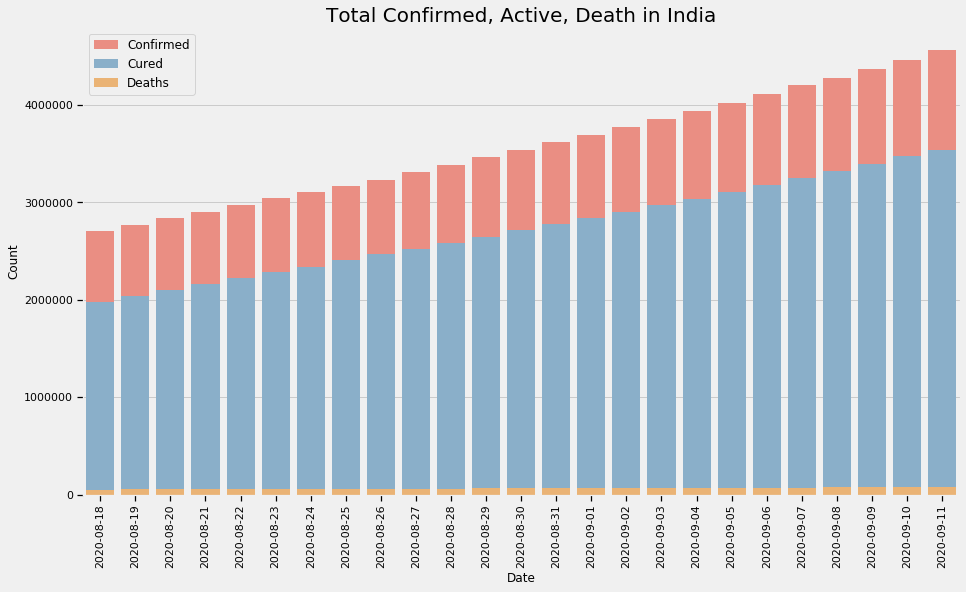

In [18]:
df2=df1.tail(25)
df2['Date'] = df2['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
plt.figure(figsize=(14,8))
sns.barplot(data=df2,x='Date',y='Confirmed',color=sns.color_palette('Set3')[3],label='Confirmed')
sns.barplot(data=df2,x='Date',y='Cured',color=sns.color_palette('Set3')[4],label='Cured')
sns.barplot(data=df2,x='Date',y='Deaths',color=sns.color_palette('Set3')[5],label='Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)
plt.legend(frameon=True,fontsize=12);

In [19]:
state_cases=covid19India.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases['Active'] = state_cases['Confirmed'] - abs((state_cases['Deaths']- state_cases['Cured']))
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Reds',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Greys',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Oranges',subset=["Cure Rate (per 100)"])

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
22,Maharashtra,990795,28282,700715,318362,2.850000,70.720000
1,Andhra Pradesh,537687,4702,435647,106742,0.870000,81.020000
32,Tamil Nadu,486052,8154,429416,64790,1.680000,88.350000
18,Karnataka,430947,6937,322454,115430,1.610000,74.820000
39,Uttar Pradesh,292029,4206,221506,74729,1.440000,75.850000
11,Delhi,205482,4666,175400,34748,2.270000,85.360000
41,West Bengal,193175,3771,166027,30919,1.950000,85.950000
4,Bihar,153568,785,137544,16809,0.510000,89.570000
35,Telengana,152602,940,119467,34075,0.620000,78.290000
27,Odisha,139121,591,108001,31711,0.420000,77.630000


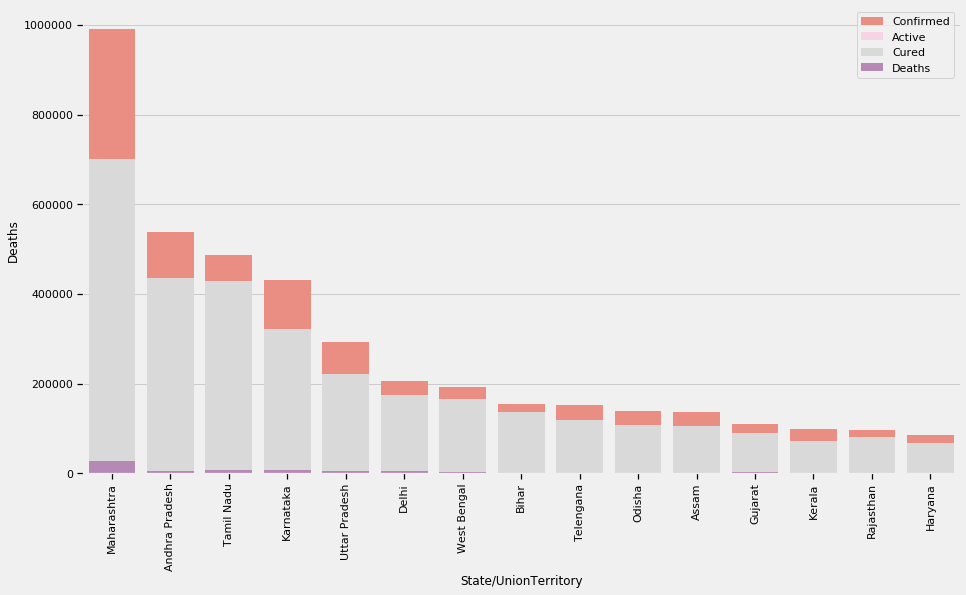

In [20]:
state_cases=state_cases.sort_values('Confirmed', ascending= False).fillna(0)
state_cases=state_cases.head(15)
state_cases
plt.figure(figsize=(14,8))
sns.barplot(data=state_cases,x='State/UnionTerritory',y='Confirmed',color=sns.color_palette('Set3')[3],label='Confirmed')
sns.barplot(data=state_cases,x='State/UnionTerritory',y='Active',color=sns.color_palette('Set3')[7],label='Active')
sns.barplot(data=state_cases,x='State/UnionTerritory',y='Cured',color=sns.color_palette('Set3')[8],label='Cured')
sns.barplot(data=state_cases,x='State/UnionTerritory',y='Deaths',color=sns.color_palette('Set3')[9],label='Deaths')
plt.xticks(rotation=90)
plt.legend();

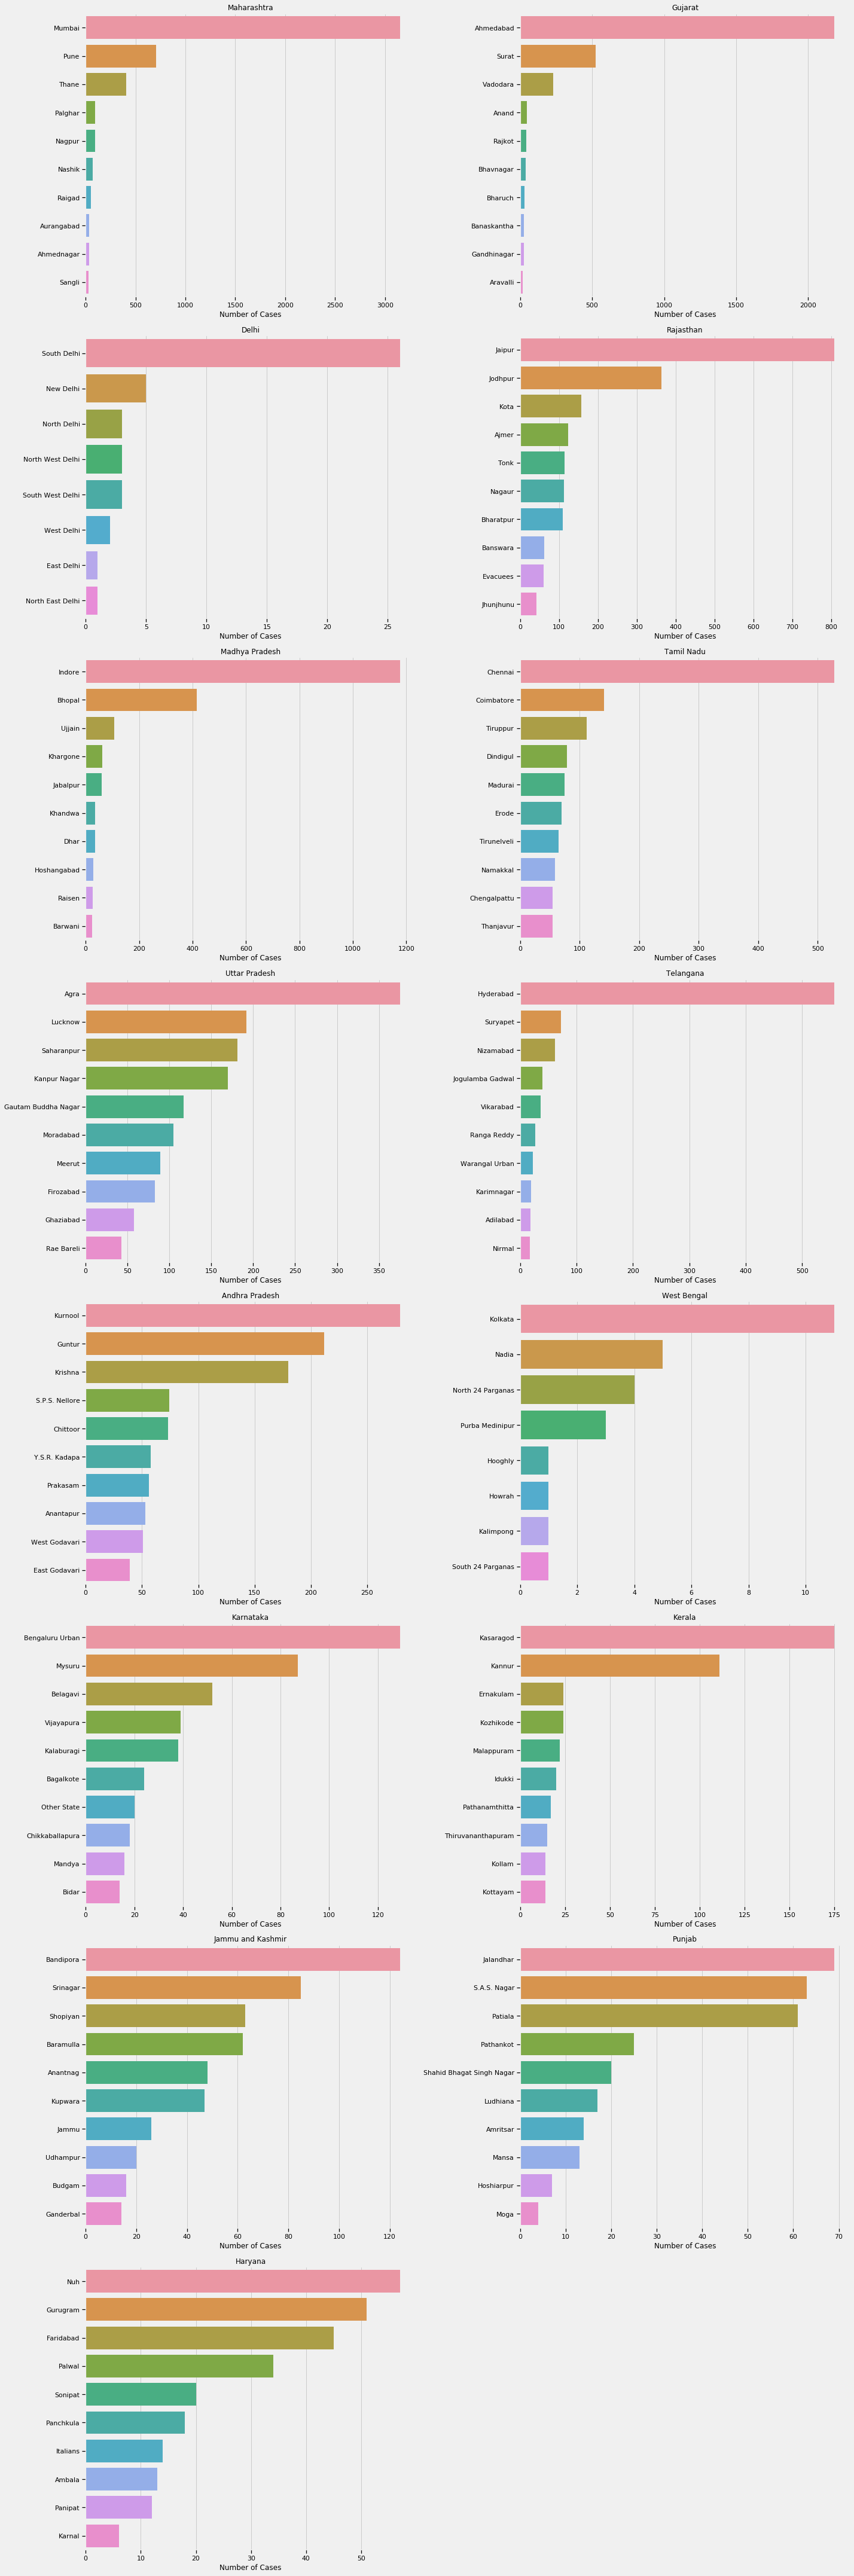

In [21]:
df3=indiDetails.groupby(['detected_state','detected_district']).count()
df3.reset_index(inplace=True)
states_list=['Maharashtra','Gujarat','Delhi','Rajasthan','Madhya Pradesh','Tamil Nadu','Uttar Pradesh','Telangana','Andhra Pradesh',
            'West Bengal','Karnataka','Kerala','Jammu and Kashmir','Punjab','Haryana']
plt.figure(figsize=(20,60))
for i,state in enumerate(states_list):
    plt.subplot(8,2,i+1)
    df4=df3[df3['detected_state']==state].sort_values('id',ascending=False)
    df4=df4.head(10)
    sns.barplot(data=df4,x='id',y='detected_district')
    plt.xlabel('Number of Cases')
    plt.ylabel('')
    plt.title(state)
plt.tight_layout()
plt.show()

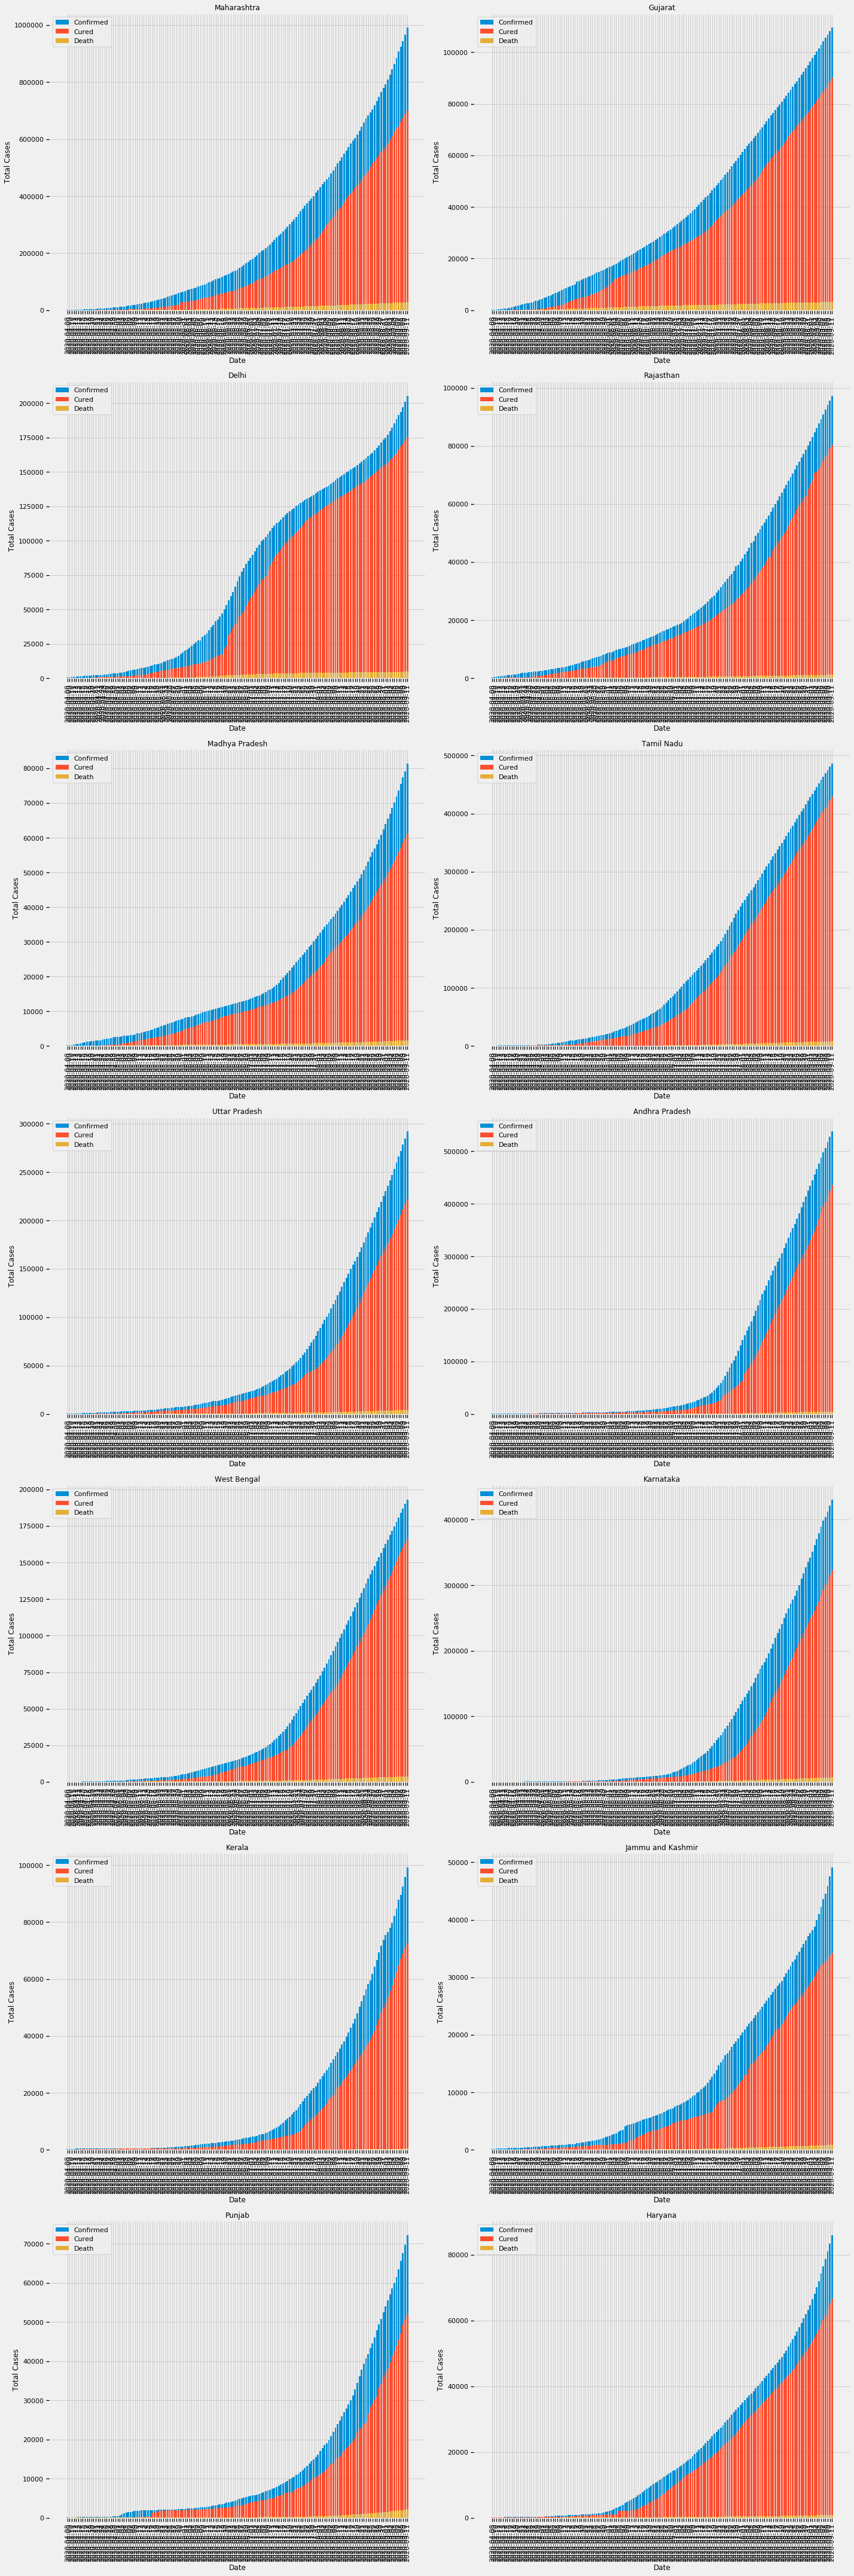

In [22]:
states_list=['Maharashtra','Gujarat','Delhi','Rajasthan','Madhya Pradesh','Tamil Nadu','Uttar Pradesh','Andhra Pradesh',
            'West Bengal','Karnataka','Kerala','Jammu and Kashmir','Punjab','Haryana']
df5=covid19India[covid19India['Date']>'2020-04-07']
df5=df5.groupby(['Date','State/UnionTerritory']).sum()
df5.reset_index(inplace=True)
df5['Date'] = df5['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
plt.figure(figsize=(20,60))

for i,state in enumerate(states_list):
    plt.subplot(7,2,i+1)
    df4=df5[df5['State/UnionTerritory']==state]
    plt.bar(df4.Date,df4.Confirmed,label='Confirmed')
    plt.bar(df4.Date,df4.Cured,label='Cured')
    plt.bar(df4.Date,df4.Deaths,label='Death')
    plt.xticks(rotation=90)
    plt.title(state)
    plt.ylabel('Total Cases')
    plt.xlabel('Date')
    plt.legend()
plt.tight_layout()
plt.show()